In [1051]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:}'.format

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 길단위인구

In [1052]:
path = '../csv/길단위인구-행정동.csv'
raw  = pd.read_csv(path, encoding='cp949')

In [1053]:
df = pd.DataFrame(raw)

In [1054]:
df.head(1)

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20191,11680531,논현2동,11183375,5543366,5640010,944451,2225363,2808767,2066050,...,1803572,2031575,1172913,1659400,1677522,1735786,1786794,1736149,1366901,1220824


In [1055]:
df.tail(1)

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
379,20233,11680750,수서동,2217525,1071071,1146454,283226,217091,357753,386346,...,305022,364443,252799,340579,335773,337349,330437,328564,274173,270647


In [1056]:
# 데이터 컬럼 확인
df.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
       '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수',
       '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수', '시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수', '월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수'],
      dtype='object')

In [1057]:
raw = df.copy()

In [1058]:
raw['기준_년분기_코드'].unique()

array([20191, 20192, 20193, 20194, 20201, 20202, 20203, 20204, 20211,
       20212, 20213, 20214, 20221, 20222, 20223, 20224, 20231, 20232,
       20233], dtype=int64)

In [1059]:
# 23년도 분기만 모아놓기

rw = raw['기준_년분기_코드'].isin([20231,20232,20233])

길단위인구 = raw[rw]

# 23_길단위인구.head()

In [1060]:
# 중복제거 값 보기
길단위인구['기준_년분기_코드'].unique()

array([20231, 20232, 20233], dtype=int64)

In [1061]:
# 동 합치기

replace_dict = {
    '신사동': '신사동',
    '논현1동': '논현동',
    '논현2동': '논현동',
    '압구정동': '압구정동',
    '개포4동' : '개포동',
    '개포1동' : '개포동',
    '개포2동' : '개포동',
    '일원1동' : '일원동',
    '삼성1동' : '삼성동',
    '삼성2동' : '삼성동',
    '대치1동' : '대치동',
    '대치2동' : '대치동',
    '대치4동' : '대치동',
    '역삼1동' : '역삼동',
    '역삼2동' : '역삼동',
    '도곡1동' : '도곡동',
    '도곡2동' : '도곡동',
    '수서동' : '수서동'
}

길단위인구.loc[:, '행정동_코드_명'] = 길단위인구['행정동_코드_명'].replace(replace_dict)
        

In [1062]:
길단위인구['행정동_코드_명'].unique()

array(['신사동', '논현동', '압구정동', '개포동', '세곡동', '일원동', '수서동', '청담동', '삼성동',
       '대치동', '역삼동', '도곡동'], dtype=object)

In [1063]:
길단위인구.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 320 to 379
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   기준_년분기_코드         60 non-null     int64 
 1   행정동_코드            60 non-null     int64 
 2   행정동_코드_명          60 non-null     object
 3   총_유동인구_수          60 non-null     int64 
 4   남성_유동인구_수         60 non-null     int64 
 5   여성_유동인구_수         60 non-null     int64 
 6   연령대_10_유동인구_수     60 non-null     int64 
 7   연령대_20_유동인구_수     60 non-null     int64 
 8   연령대_30_유동인구_수     60 non-null     int64 
 9   연령대_40_유동인구_수     60 non-null     int64 
 10  연령대_50_유동인구_수     60 non-null     int64 
 11  연령대_60_이상_유동인구_수  60 non-null     int64 
 12  시간대_00_06_유동인구_수  60 non-null     int64 
 13  시간대_06_11_유동인구_수  60 non-null     int64 
 14  시간대_11_14_유동인구_수  60 non-null     int64 
 15  시간대_14_17_유동인구_수  60 non-null     int64 
 16  시간대_17_21_유동인구_수  60 non-null     int64 
 17  시간대_21_24_유동인구_수  60

In [1064]:
# 결측치 확인
길단위인구.isnull().sum()

기준_년분기_코드           0
행정동_코드              0
행정동_코드_명            0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
연령대_30_유동인구_수       0
연령대_40_유동인구_수       0
연령대_50_유동인구_수       0
연령대_60_이상_유동인구_수    0
시간대_00_06_유동인구_수    0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_24_유동인구_수    0
월요일_유동인구_수          0
화요일_유동인구_수          0
수요일_유동인구_수          0
목요일_유동인구_수          0
금요일_유동인구_수          0
토요일_유동인구_수          0
일요일_유동인구_수          0
dtype: int64

In [1065]:
길단위인구[3:50]

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
323,20231,11680545,압구정동,8120610,3672746,4447864,1093324,1513318,1667081,1554094,...,1429113,1655329,850423,1127362,1196919,1191650,1228296,1270051,1153509,952823
324,20232,11680690,개포동,3454301,1629221,1825081,612229,418092,573450,605661,...,395963,509559,423257,505308,504216,507208,501673,497508,468192,470195
325,20232,11680700,세곡동,3510595,1599818,1910778,997988,327332,458772,593596,...,388671,544229,464780,503301,504679,501893,497723,494407,499125,509469
326,20232,11680730,일원동,2587942,1260465,1327476,351343,343661,439907,432374,...,290213,414229,343412,372876,371353,372936,368615,371655,363643,366865
327,20232,11680750,수서동,2291626,1114163,1177463,315811,217434,367728,393554,...,315597,374901,262673,341653,346293,352215,350692,343080,282525,275167
328,20232,11680510,신사동,7082053,3334166,3747885,774451,1441425,1611377,1400039,...,1251030,1482277,731224,1010768,1051907,1071804,1080222,1086305,955612,825435
329,20232,11680521,논현동,10126616,4920257,5206359,600626,2367292,2705402,1977889,...,1525318,1781828,1107358,1488270,1531672,1567023,1574980,1532983,1266414,1165275
330,20232,11680531,논현동,11513036,5780571,5732465,1062645,2109371,2895299,2455277,...,1895486,1998466,1149859,1704141,1800869,1856920,1858045,1760613,1333511,1198939
331,20232,11680545,압구정동,7991790,3623393,4368397,1094326,1469252,1649327,1542200,...,1399264,1616064,844799,1111460,1168146,1187885,1206060,1231944,1128435,957860
332,20232,11680565,청담동,9899247,4594952,5304295,1285468,1541781,2083979,2004101,...,1524092,1690737,1053105,1394788,1482441,1514955,1513253,1494493,1326708,1172608


In [1066]:
q3 = 길단위인구.iloc[:,3:6].quantile(0.75)
q1 = 길단위인구.iloc[:,3:6].quantile(0.25)

iqr = q3 - q1

iqr

총_유동인구_수    6449168.0
남성_유동인구_수   3108962.5
여성_유동인구_수   3259654.5
dtype: float64

## 이상치 확인

In [1067]:
# 

def find_outliers_by_column(data):
    numeric_columns = data.select_dtypes(include=['number']).columns
    outlier_dict = {}
    for col in numeric_columns:
        outliers = data[col]
        q3 = outliers.quantile(0.75)
        q1 = outliers.quantile(0.25)
        iqr = q3 - q1
        is_outlier = (outliers > q3 + 1.5 * iqr) | (outliers < q1 - 1.5 * iqr)
        outlier_dict[col] = is_outlier
    return outlier_dict

In [1068]:
outlier_result = find_outliers_by_column(길단위인구)

# 각 열에 대해 True인 값 추출
for col, is_outlier in outlier_result.items():
    outliers = 길단위인구.loc[is_outlier, col]
    print(f'{col}의 이상치:')
    print(outliers)

기준_년분기_코드의 이상치:
Series([], Name: 기준_년분기_코드, dtype: int64)
행정동_코드의 이상치:
Series([], Name: 행정동_코드, dtype: int64)
총_유동인구_수의 이상치:
338    21645248
350    22048225
370    21410303
Name: 총_유동인구_수, dtype: int64
남성_유동인구_수의 이상치:
338    11291245
350    11484790
370    11111628
Name: 남성_유동인구_수, dtype: int64
여성_유동인구_수의 이상치:
338    10354004
350    10563435
370    10298674
Name: 여성_유동인구_수, dtype: int64
연령대_10_유동인구_수의 이상치:
369    2938692
Name: 연령대_10_유동인구_수, dtype: int64
연령대_20_유동인구_수의 이상치:
338    5184837
350    5330077
370    5191968
Name: 연령대_20_유동인구_수, dtype: int64
연령대_30_유동인구_수의 이상치:
338    6049966
350    6131984
370    5899049
Name: 연령대_30_유동인구_수, dtype: int64
연령대_40_유동인구_수의 이상치:
338    4310803
350    4342325
370    4257668
Name: 연령대_40_유동인구_수, dtype: int64
연령대_50_유동인구_수의 이상치:
Series([], Name: 연령대_50_유동인구_수, dtype: int64)
연령대_60_이상_유동인구_수의 이상치:
Series([], Name: 연령대_60_이상_유동인구_수, dtype: int64)
시간대_00_06_유동인구_수의 이상치:
Series([], Name: 시간대_00_06_유동인구_수, dtype: int64)
시간대_06_11_유동인구_수의 이상치:
338    4447

In [1069]:
# 이상치 탐지 함수

def find_outlier(data, col1, col2):
    outliers = data.loc[:, col1:col2]
    q3 = data.loc[:, col1:col2].quantile(0.75)
    q1 = data.loc[:, col1:col2].quantile(0.25)
    iqr = q3 - q1
    find_outlier = (outliers > q3 + 1.5 * iqr) | (outliers < q1 - 1.5 * iqr)
    return find_outlier

In [1070]:
result = find_outlier(길단위인구, '총_유동인구_수', '일요일_유동인구_수')
outliers = 길단위인구[result]

outliers

,기준_년분기_코드,행정동_코드,행정동_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 각 구간별로 이상치 확인

In [1071]:
s_p = ['총_유동인구_수','남성_유동인구_수','여성_유동인구_수']
age_p = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수','연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
time_p = ['시간대_00_06_유동인구_수',
       '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수',
       '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']
week_p = ['월요일_유동인구_수', '화요일_유동인구_수',
       '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']

In [1072]:
성별_이상치 = outliers[s_p].notna()

성별_이상치[성별_이상치.any(axis=1)]

,총_유동인구_수,남성_유동인구_수,여성_유동인구_수
338,True,True,True
350,True,True,True
370,True,True,True


In [1073]:
연령_이상치 = outliers[age_p].notna()

연령_이상치[연령_이상치.any(axis=1)]


,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
338,False,True,True,True,False,False
350,False,True,True,True,False,False
369,True,False,False,False,False,False
370,False,True,True,True,False,False


In [1074]:
시간_이상치 = outliers[time_p].notna()

시간_이상치[시간_이상치.any(axis=1)]

,시간대_00_06_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수
338,False,True,True,True,True,True
350,False,True,True,True,True,True
370,False,True,True,True,True,True


In [1075]:
요일_이상치 = outliers[week_p].notna()

요일_이상치[요일_이상치.any(axis=1)]

,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
338,True,True,True,True,True,True,True
350,True,True,True,True,True,True,True
370,True,True,True,True,True,False,True


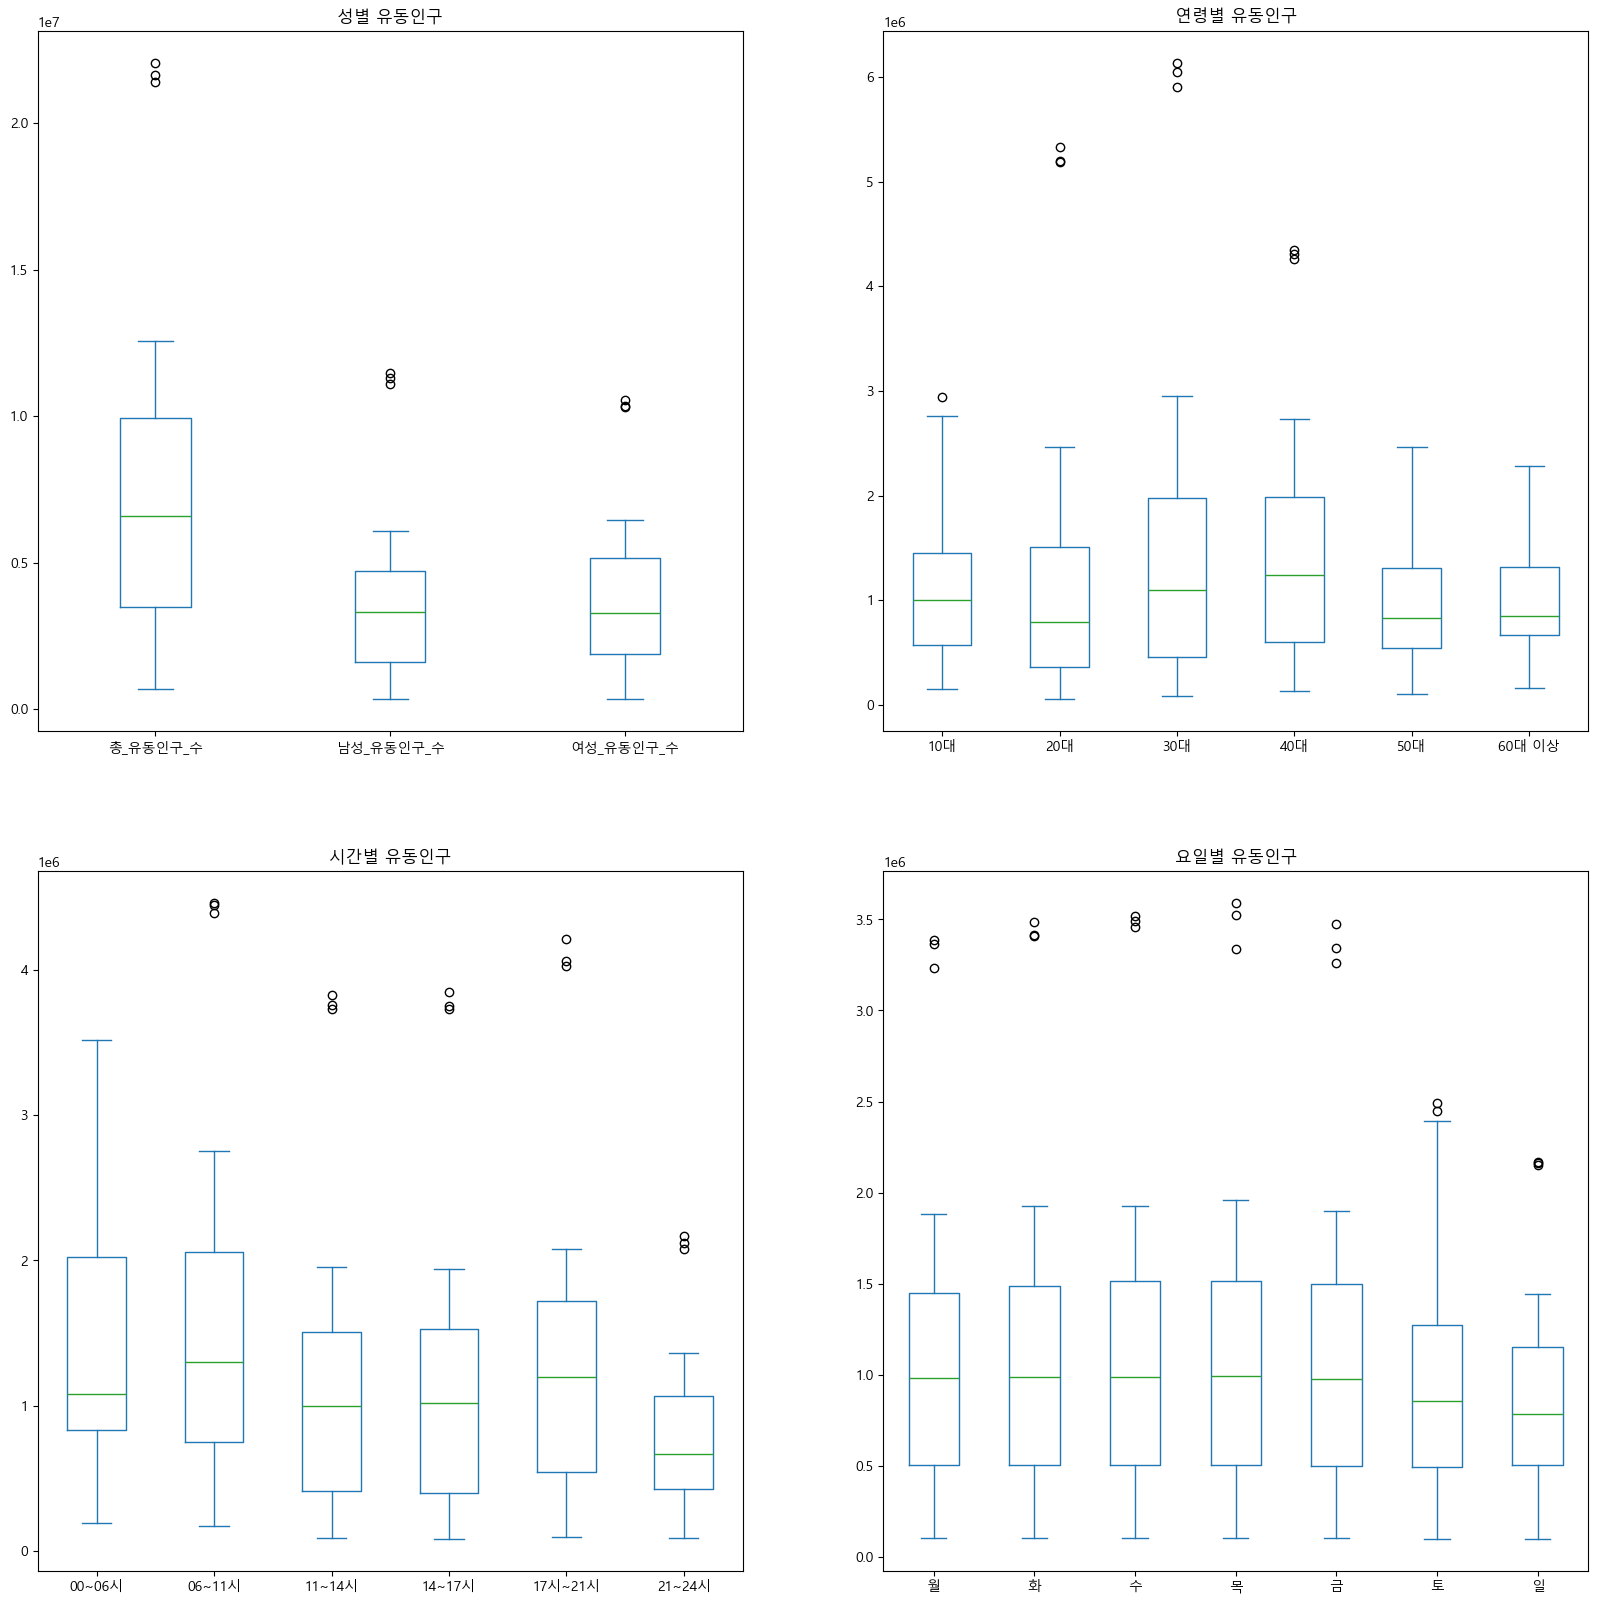

In [1076]:
# 이상치 제거 전 boxplot 확인

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

길단위인구[s_p].plot.box(ax=axes[0,0], title='성별 유동인구')
길단위인구[age_p].plot.box(ax=axes[0,1], title='연령별 유동인구')
길단위인구[time_p].plot.box(ax=axes[1,0], title='시간별 유동인구')
길단위인구[week_p].plot.box(ax=axes[1,1], title='요일별 유동인구')

label_b = ['10대', '20대','30대','40대','50대','60대 이상']
label_c = ['00~06시','06~11시','11~14시','14~17시','17시~21시','21~24시']
label_d = ['월','화','수','목','금','토','일']

axes[0,1].set_xticklabels(label_b,fontsize=10)
axes[1,0].set_xticklabels(label_c,fontsize=10)
axes[1,1].set_xticklabels(label_d,fontsize=10)

plt.show()

## 이상치 삭제 후 확인

In [1077]:
길단위_인구 = 길단위인구.copy()

In [1078]:
# 현재 이상치가 존재하는 행들 : 338,350,369,370

# 이상치가 있는 행들 삭제

길단위_인구.drop([338,350,369,370],inplace=True)

In [1079]:
outl = find_outlier(길단위_인구,'연령대_10_유동인구_수','연령대_60_이상_유동인구_수')

In [1080]:
# 이상치가 다시 존재
outl[outl['연령대_10_유동인구_수'] == True]

,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
349,True,False,False,False,False,False


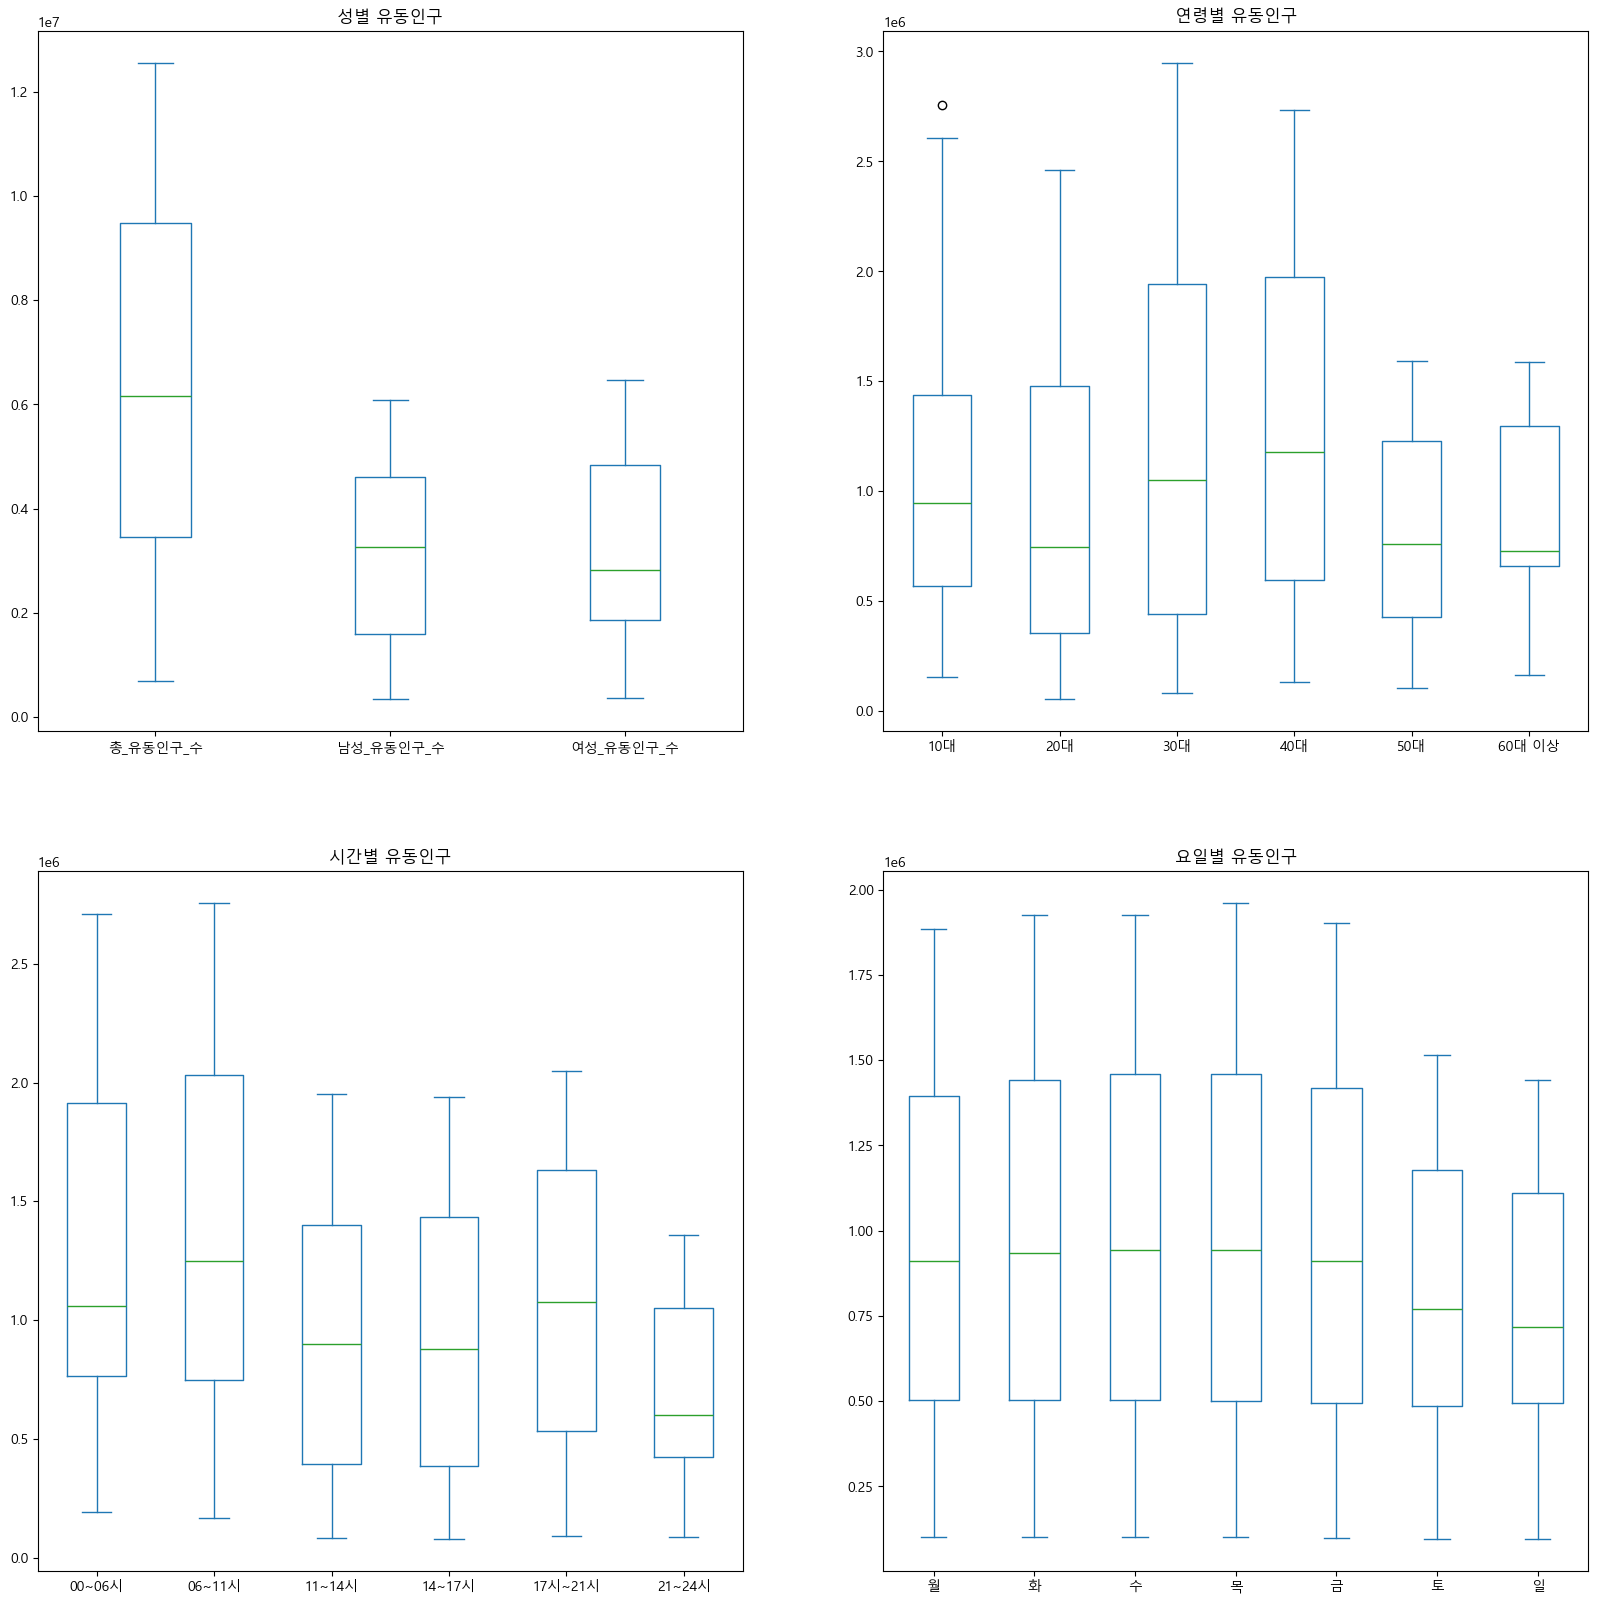

In [1081]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

길단위_인구[s_p].plot.box(ax=axes[0,0], title='성별 유동인구')
길단위_인구[age_p].plot.box(ax=axes[0,1], title='연령별 유동인구')
길단위_인구[time_p].plot.box(ax=axes[1,0], title='시간별 유동인구')
길단위_인구[week_p].plot.box(ax=axes[1,1], title='요일별 유동인구')

label_b = ['10대', '20대','30대','40대','50대','60대 이상']
label_c = ['00~06시','06~11시','11~14시','14~17시','17시~21시','21~24시']
label_d = ['월','화','수','목','금','토','일']

axes[0,1].set_xticklabels(label_b,fontsize=10)
axes[1,0].set_xticklabels(label_c,fontsize=10)
axes[1,1].set_xticklabels(label_d,fontsize=10)

plt.show()

## 시각화

In [1082]:
# 이상치 제거 전 

길단위인구.reset_index(drop=True, inplace=True)

길단위인구.loc[1,'행정동_코드_명']


'논현동'

In [1083]:
# 같은 동끼리 그룹화 해서 정렬

leng = len(길단위인구['행정동_코드_명'].unique())
unique_values = 길단위인구['행정동_코드_명'].unique()

group_data = []

for i in range(leng):
    pp_data = 길단위인구[길단위인구['행정동_코드_명'] == unique_values[i]]

    s_populaion = pp_data.groupby(['행정동_코드_명','기준_년분기_코드']).mean()

    group_data.append(s_populaion)



grouped_data = pd.concat(group_data)

# 결과 확인
grouped_data



행정동_코드           총_유동인구_수          남성_유동인구_수  \
행정동_코드_명 기준_년분기_코드                                                            
신사동      20231             11680510.0          7192218.0          3370126.0   
         20232             11680510.0          7082053.0          3334166.0   
         20233             11680510.0          7070958.0          3309806.0   
논현동      20231             11680526.0         10844361.0          5365516.0   
         20232             11680526.0         10819826.0          5350414.0   
         20233             11680526.0         10966984.0          5397763.0   
압구정동     20231             11680545.0          8120610.0          3672746.0   
         20232             11680545.0          7991790.0          3623393.0   
         20233             11680545.0          7834455.0          3575024.0   
개포동      20231     11680673.333333334 1997059.3333333333  945151.6666666666   
         20232     11680673.333333334          2033497.0  953288.6666666666   
         20233     11680673.333333334 2123894.6666666665 1001759.3333333334   
세곡동      20231             11680700.0          3458460.0          1585495.0   
         20232             11680700.0          3510595.0          1599818.0   
         20233             11680700.0          3542249.0          1599385.0   
일원동      20231             11680730.0          2864225.0          1372684.0   
         20232             11680730.0          2587942.0          1260465.0   
         20233             11680730.0          2626715.0          1265907.0   
수서동      20231             11680750.0          2211061.0          1085908.0   
         20232             11680750.0          2291626.0          1114163.0   
         20233             11680750.0          2217525.0          1071071.0   
청담동      20231             11680565.0          9818338.0          4575576.0   
         20232             11680565.0          9899247.0          4594952.0   
         20233             11680565.0          9540889.0          4431972.0   
삼성동      20231             11680585.0          7001768.0          3499897.0   
         20232             11680585.0          7007490.0          3506231.5   
         20233             11680585.0          7065903.0          3522817.5   
대치동      20231     11680613.333333334  7114199.333333333 3604123.6666666665   
         20232     11680613.333333334  7008833.666666667 3558964.6666666665   
         20233     11680613.333333334          7225297.0          3660453.0   
역삼동      20231             11680645.0         17301205.0          8785881.0   
         20232             11680645.0         16883114.0          8569443.0   
         20233             11680645.0         16795805.5          8486602.5   
도곡동      20231             11680655.5          5438054.0          2524333.5   
         20232             11680655.5          5476488.5          2540389.5   
         20233             11680655.5          5580895.0          2594875.0   

                            여성_유동인구_수      연령대_10_유동인구_수      연령대_20_유동인구_수  \
행정동_코드_명 기준_년분기_코드                                                            
신사동      20231              3822091.0           780389.0          1509263.0   
         20232              3747885.0           774451.0          1441425.0   
         20233              3761152.0           816554.0          1425051.0   
논현동      20231              5478845.0           785176.0          2287219.0   
         20232              5469412.0           831635.5          2238331.5   
         20233              5569221.5           902365.5          2234024.0   
압구정동     20231              4447864.0          1093324.0          1513318.0   
         20232              4368397.0          1094326.0          1469252.0   
         20233              4259430.0          1105798.0          1430659.0   
개포동      20231              1051908.0           375682.0 220536.66666666666   
         20232     1080208.6666666667  413142.6666666667           217087.0   
 

In [1084]:
'''
sinsa_data_pp = grouped_data.iloc[:3,:]
nonhn_data_pp = grouped_data.iloc[4:6,:]
apgu_data_pp = grouped_data.iloc[7:9,:]
gaepo_data_pp = grouped_data.iloc[10:12,:]
saeg_data_pp = grouped_data.iloc[13:15,:]
ilwon_data_pp = grouped_data.iloc[16:18,:]
suseo_data_pp = grouped_data.iloc[19:21,:]
chd_data_pp = grouped_data.iloc[22:24,:]
sams_data_pp = grouped_data.iloc[25:27,:]
daechi_data_pp = grouped_data.iloc[28:30,:]
yeok_data_pp = grouped_data.iloc[31:33,:]
dogok_data_pp = grouped_data.iloc[34:36,:]


data_frames = {
    "신사동": sinsa_data_pp,
    "논현동": nonhn_data_pp,
    "압구정동": apgu_data_pp,
    "개포동": gaepo_data_pp,
    "세곡동": saeg_data_pp,
    "일원동": ilwon_data_pp,
    "수서동": suseo_data_pp,
    "청담동" : chd_data_pp,
    "삼성동" : sams_data_pp,
    "대치동" : daechi_data_pp,
    "역삼동" : yeok_data_pp,
    "도곡동" : dogok_data_pp
}

'''

'\nsinsa_data_pp = grouped_data.iloc[:3,:]\nnonhn_data_pp = grouped_data.iloc[4:6,:]\napgu_data_pp = grouped_data.iloc[7:9,:]\ngaepo_data_pp = grouped_data.iloc[10:12,:]\nsaeg_data_pp = grouped_data.iloc[13:15,:]\nilwon_data_pp = grouped_data.iloc[16:18,:]\nsuseo_data_pp = grouped_data.iloc[19:21,:]\nchd_data_pp = grouped_data.iloc[22:24,:]\nsams_data_pp = grouped_data.iloc[25:27,:]\ndaechi_data_pp = grouped_data.iloc[28:30,:]\nyeok_data_pp = grouped_data.iloc[31:33,:]\ndogok_data_pp = grouped_data.iloc[34:36,:]\n\n\ndata_frames = {\n    "신사동": sinsa_data_pp,\n    "논현동": nonhn_data_pp,\n    "압구정동": apgu_data_pp,\n    "개포동": gaepo_data_pp,\n    "세곡동": saeg_data_pp,\n    "일원동": ilwon_data_pp,\n    "수서동": suseo_data_pp,\n    "청담동" : chd_data_pp,\n    "삼성동" : sams_data_pp,\n    "대치동" : daechi_data_pp,\n    "역삼동" : yeok_data_pp,\n    "도곡동" : dogok_data_pp\n}\n\n'

In [1085]:
# 동에 관한 값을 반환하는 함수

def find_dongs(x):
    dong = grouped_data[grouped_data.index.get_level_values('행정동_코드_명') == x]
    return dong

In [1086]:

# 동을 찾는 함수

def find_dong(x):
    dong_data = []
    for dong_name in x:
        dong_data.append(grouped_data[grouped_data.index.get_level_values('행정동_코드_명') == dong_name])
    return dong_data

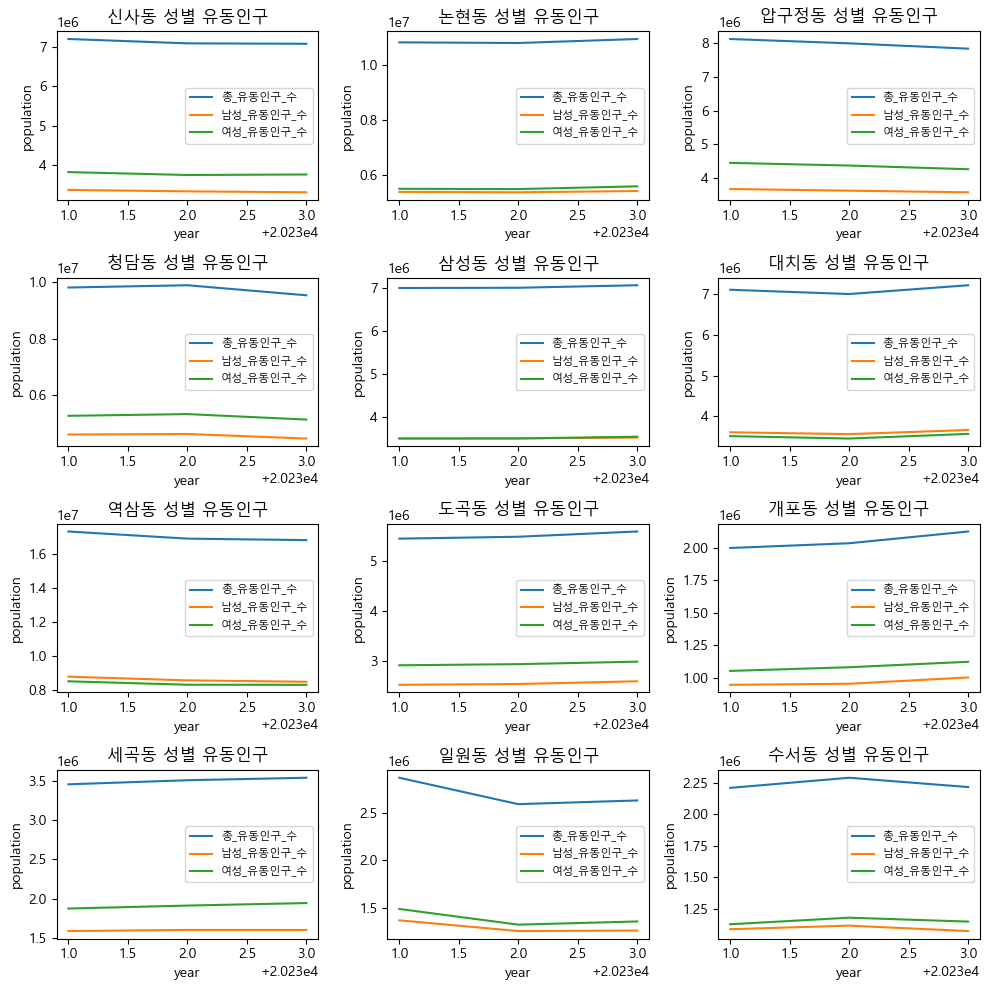

In [1087]:
# 성별 유동인구 그래프



fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동_코드_명')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['총_유동인구_수'], label='총_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['남성_유동인구_수'], label='남성_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['여성_유동인구_수'], label='여성_유동인구_수')

    axes[row, col].set_title(name + ' 성별 유동인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize=8, fancybox=True)
    
plt.tight_layout()
plt.show()

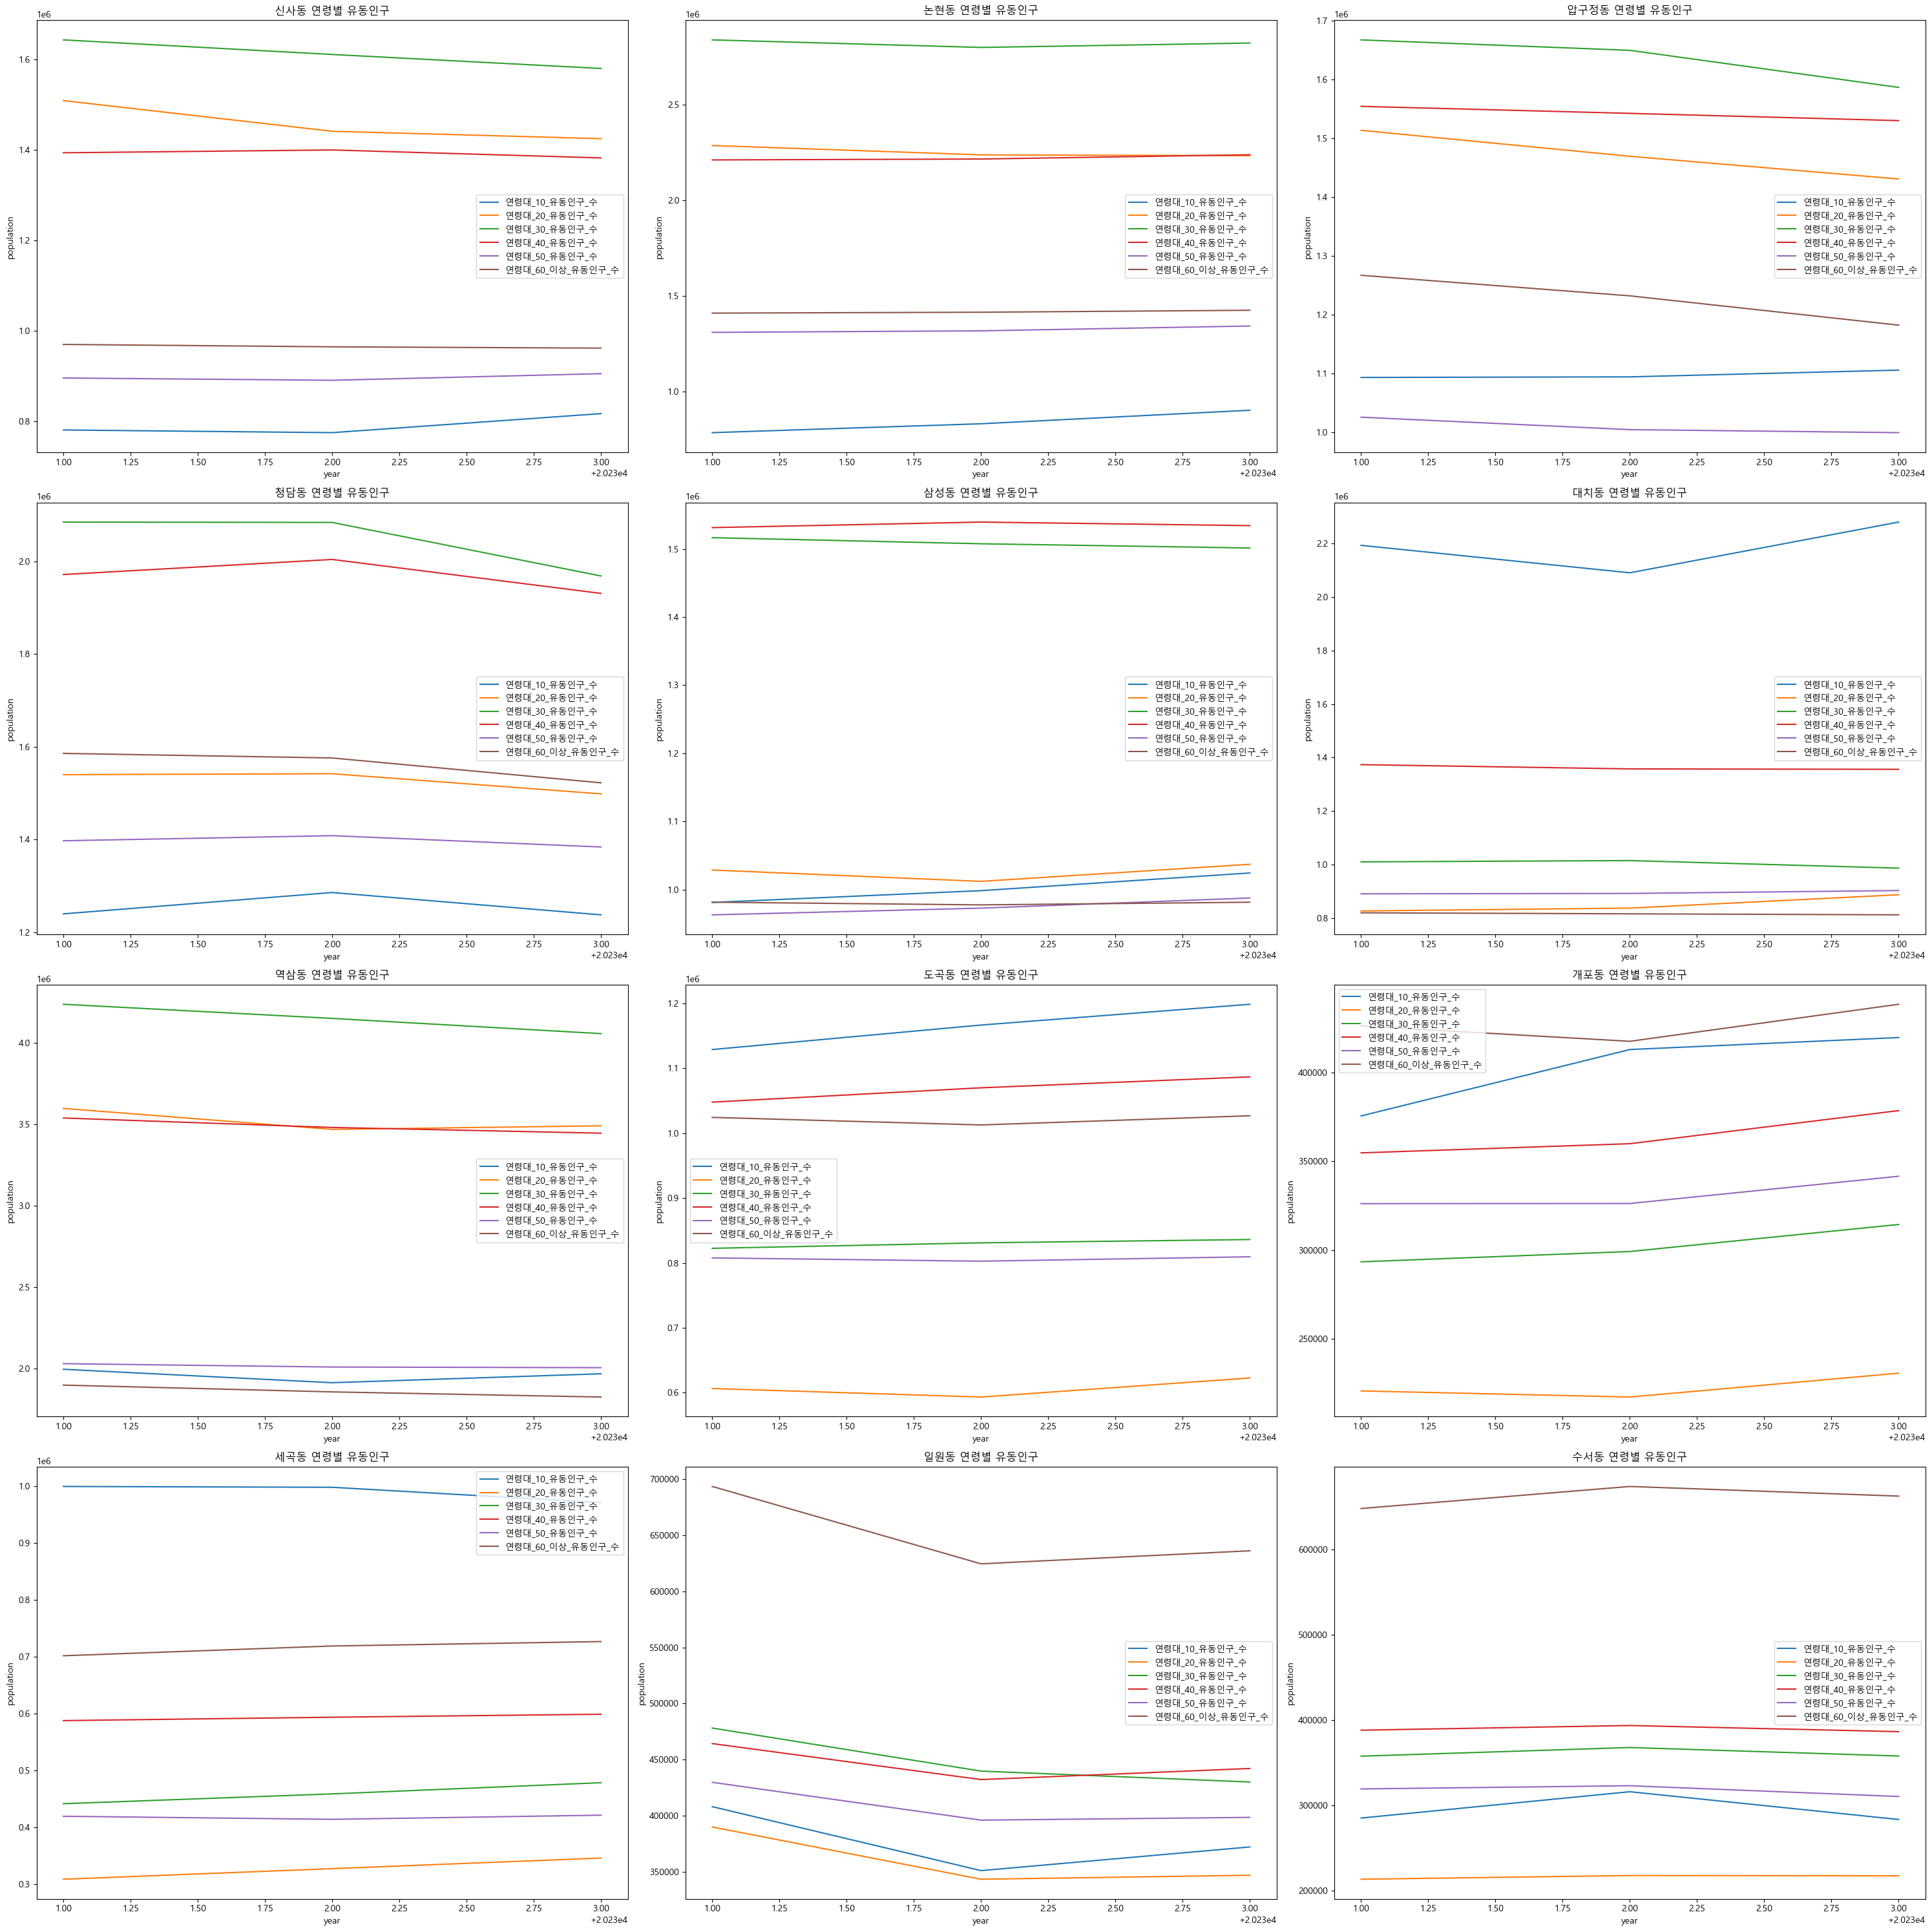

In [1088]:
# 연령별 유동인구 그래프


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동_코드_명')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_10_유동인구_수'], label='연령대_10_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_20_유동인구_수'], label='연령대_20_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_30_유동인구_수'], label='연령대_30_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_40_유동인구_수'], label='연령대_40_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_50_유동인구_수'], label='연령대_50_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['연령대_60_이상_유동인구_수'], label='연령대_60_이상_유동인구_수')

    axes[row, col].set_title(name + ' 연령별 유동인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize='10', fancybox=True)

plt.tight_layout()
plt.show()

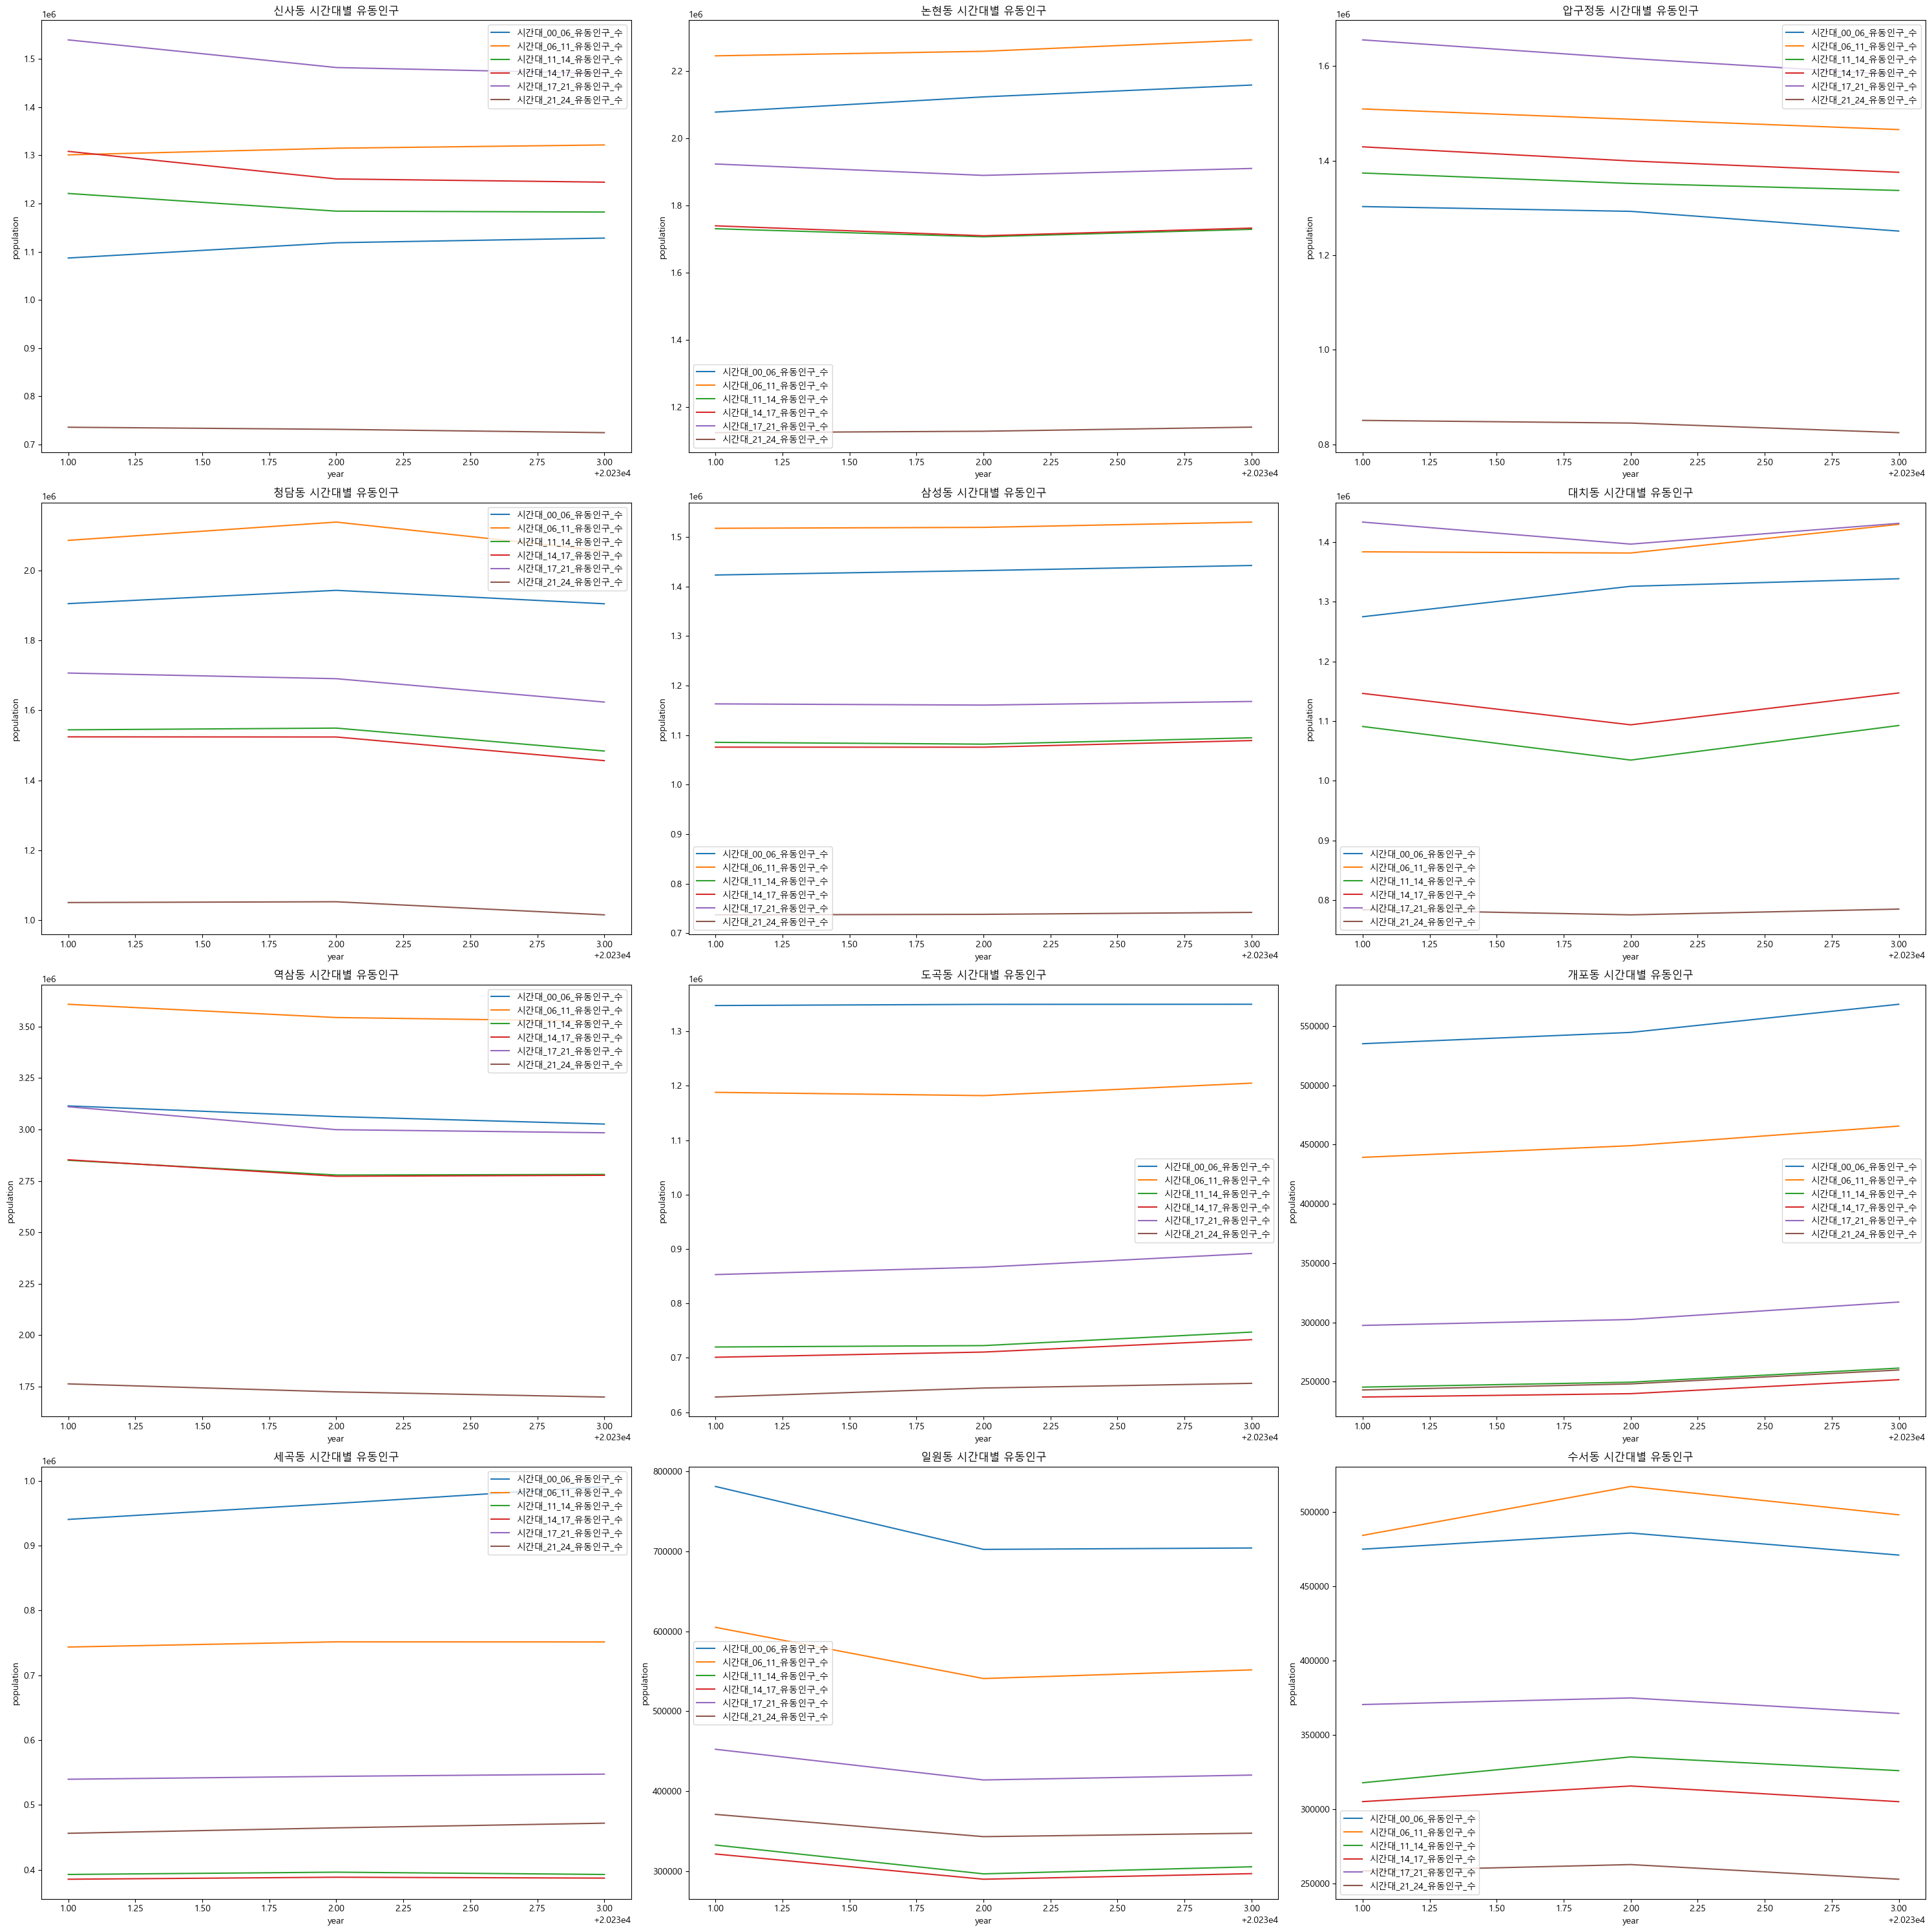

In [1089]:

# 시간대별 유동인구 그래프


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동_코드_명')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_00_06_유동인구_수'], label='시간대_00_06_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_06_11_유동인구_수'], label='시간대_06_11_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_11_14_유동인구_수'], label='시간대_11_14_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_14_17_유동인구_수'], label='시간대_14_17_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_17_21_유동인구_수'], label='시간대_17_21_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['시간대_21_24_유동인구_수'], label='시간대_21_24_유동인구_수')

    axes[row, col].set_title(name + ' 시간대별 유동인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize='10', fancybox=True)

plt.tight_layout()
plt.show()

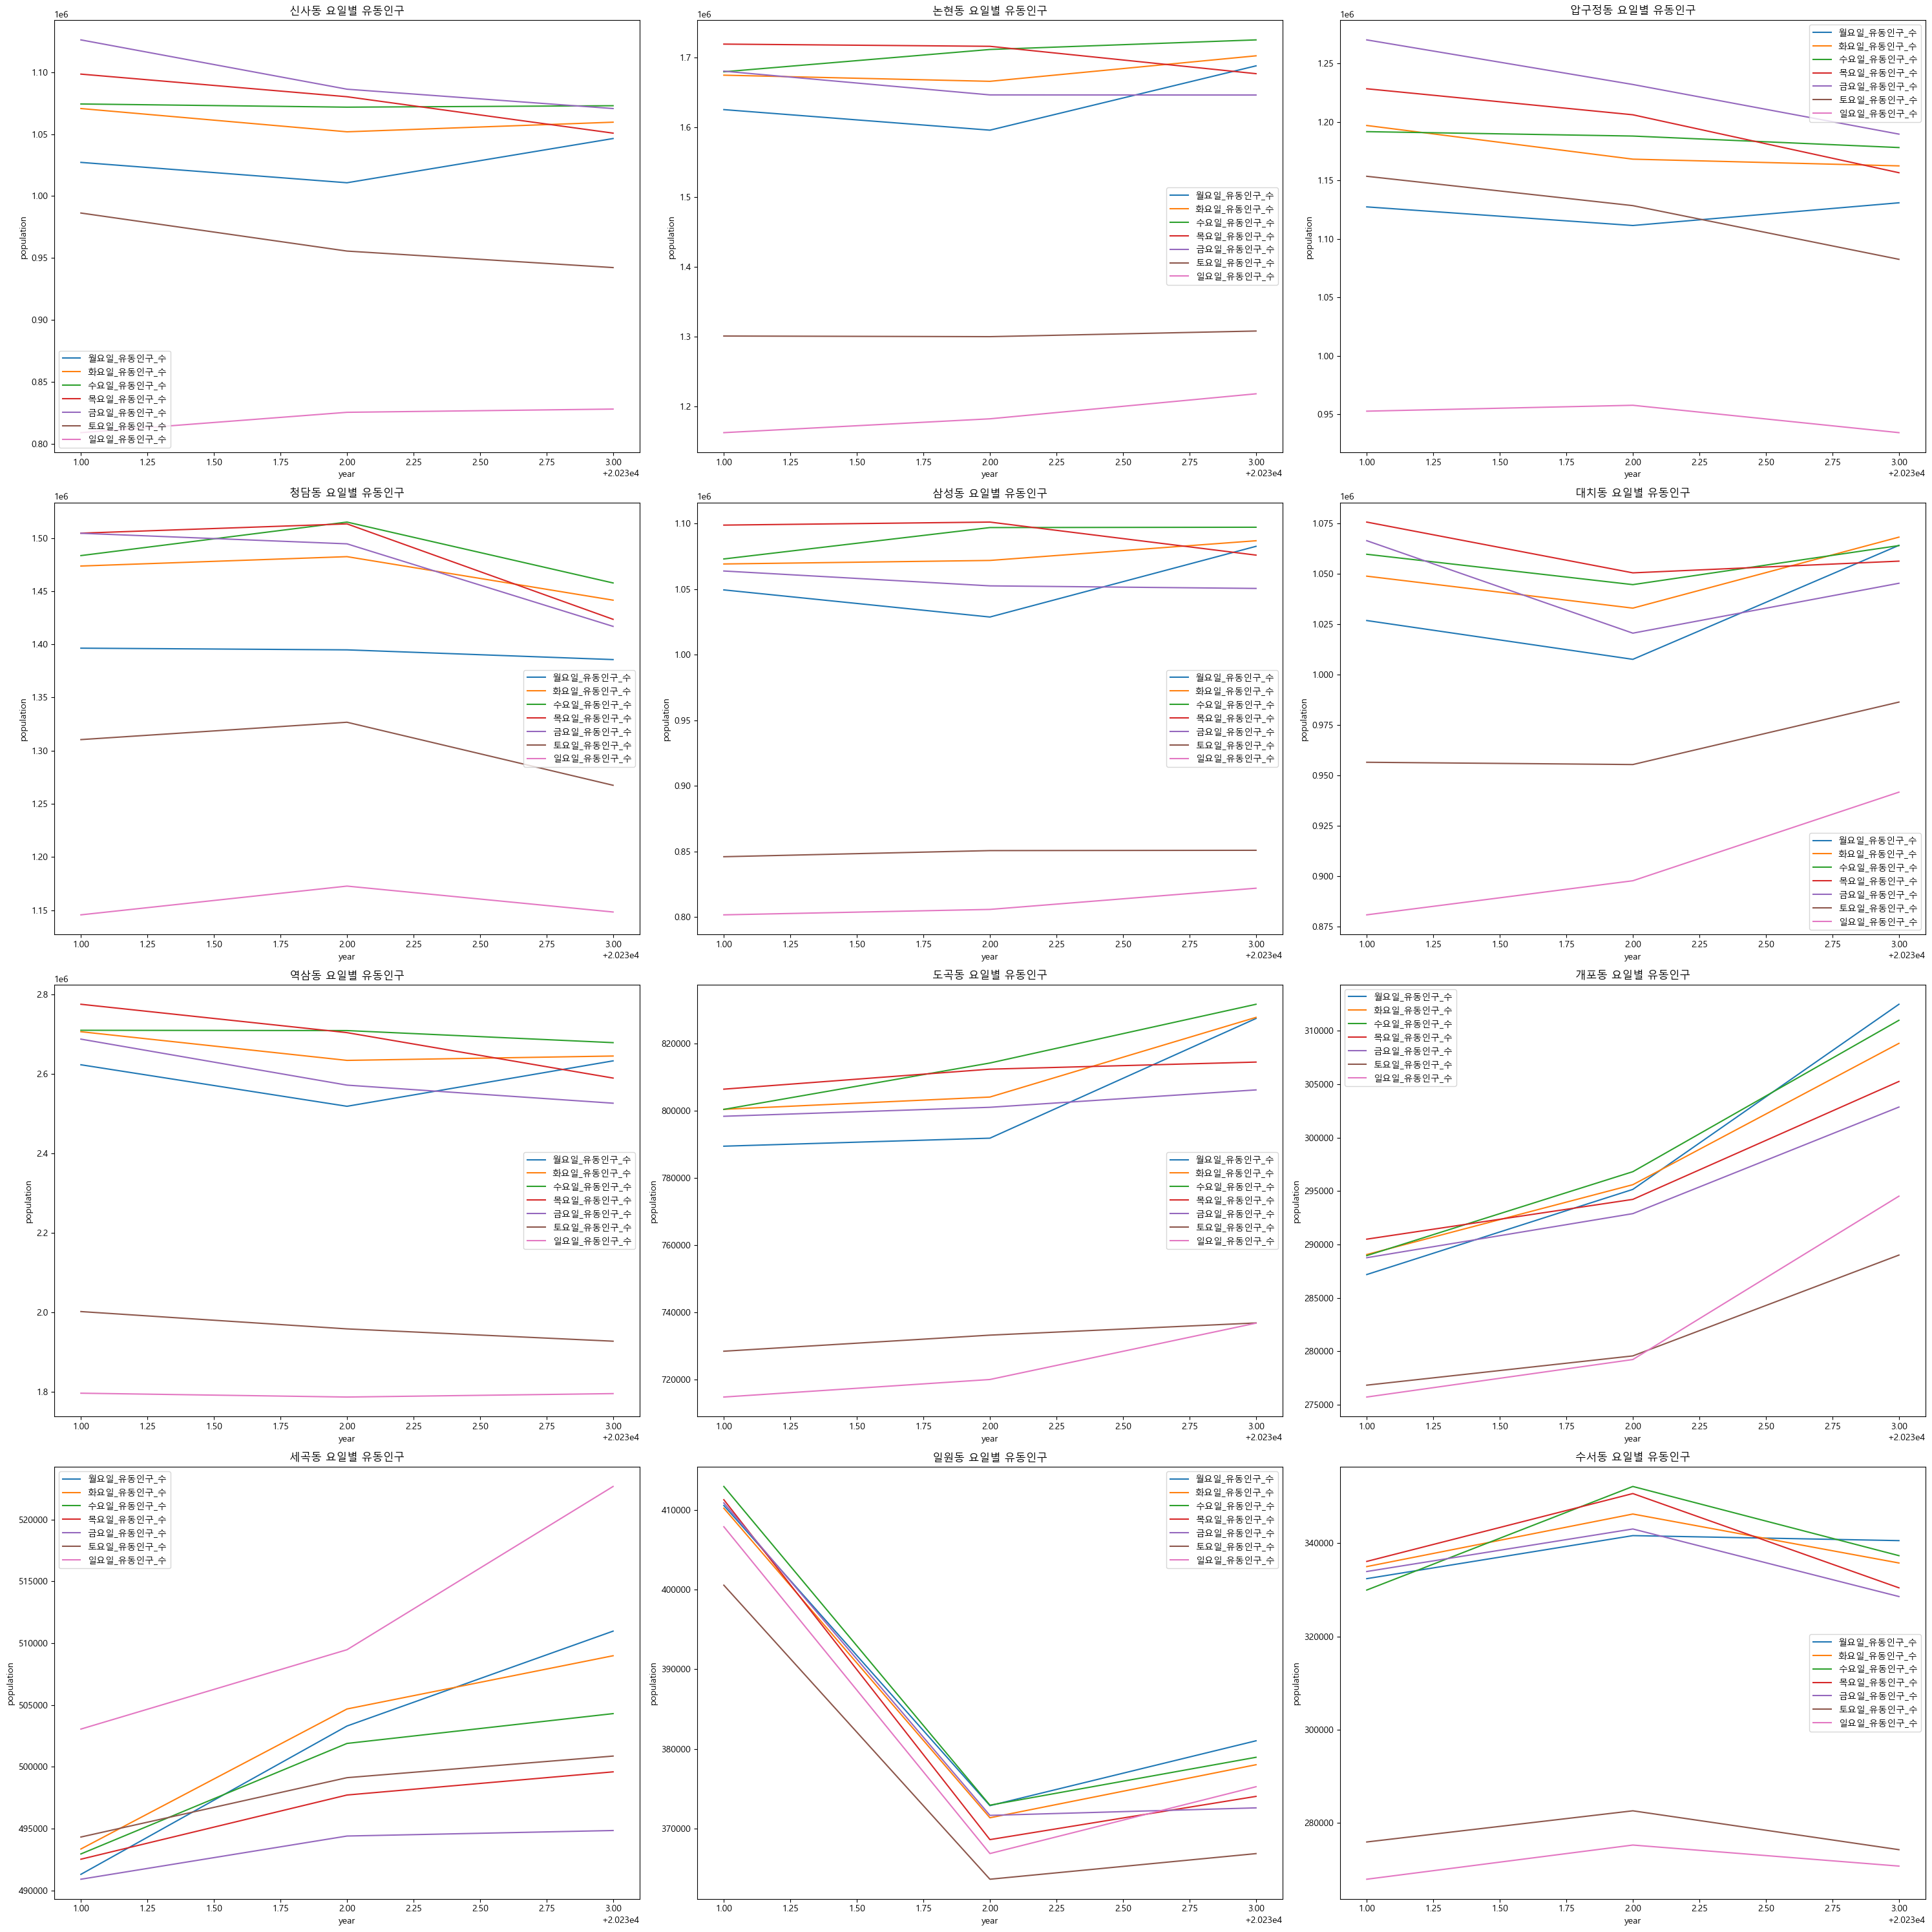

In [1090]:
# 요일별 유동인구 그래프



fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))

dong_n = ['신사동', '논현동', '압구정동', '청담동', '삼성동', '대치동', '역삼동', '도곡동', '개포동', '세곡동',
       '일원동', '수서동']
    
    
for i, dong_data in enumerate(find_dong(dong_n)):
    row = i // 3
    col = i % 3
    
    name = dong_data.index.get_level_values('행정동_코드_명')[0]
    
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['월요일_유동인구_수'], label='월요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['화요일_유동인구_수'], label='화요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['수요일_유동인구_수'], label='수요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['목요일_유동인구_수'], label='목요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['금요일_유동인구_수'], label='금요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['토요일_유동인구_수'], label='토요일_유동인구_수')
    axes[row, col].plot(dong_data.index.get_level_values('기준_년분기_코드'), dong_data['일요일_유동인구_수'], label='일요일_유동인구_수')

    axes[row, col].set_title(name + ' 요일별 유동인구')
    axes[row, col].set_xlabel('year')
    axes[row, col].set_ylabel('population')
    axes[row, col].legend(loc='best', fontsize='10', fancybox=True)

plt.tight_layout()
plt.show()